# Summer Olympics Data Analysis Assignment

In [1]:
import pandas as pd
import numpy as np

In [2]:
a=pd.read_csv('summer.csv')
a

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [3]:
a.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [4]:
a=a.dropna()
a

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [5]:
a.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [33]:
a['Country'].unique

<bound method Series.unique of 0        HUN
1        AUT
2        GRE
3        GRE
4        GRE
        ... 
31160    POL
31161    IRI
31162    RUS
31163    ARM
31164    SWE
Name: Country, Length: 31161, dtype: object>

### 1. In how many cities Summer Olympics is held so far?

In [6]:
len(a.City.unique())

# total 22 cities conducted in summer olympics

22

### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [149]:
a[a.Medal=='Gold'].Sport.value_counts().head()

Aquatics      1421
Athletics     1214
Rowing         890
Gymnastics     820
Fencing        552
Name: Sport, dtype: int64

### OR

In [8]:
gold_sports=a[a.Medal=='Gold'].groupby(['Sport']).Medal.size().sort_values(ascending = False)
gold_sports.head()

Sport
Aquatics      1421
Athletics     1214
Rowing         890
Gymnastics     820
Fencing        552
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Sport'>

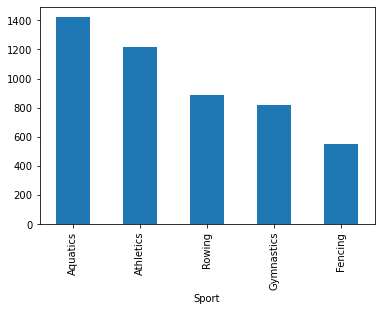

In [9]:
gold_sports.head().plot.bar()

### 3. Which sport is having most number of medals so far? (Top 5)

In [151]:
a.Sport.value_counts().head()

Aquatics      4170
Athletics     3637
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Sport, dtype: int64

### OR

In [19]:
medals=a.groupby(['Sport']).Medal.count().sort_values(ascending = False)
medals.head()
# Aquatics,Athletics,Rowing,Gymnastics,Fencing this are the five sports having most numbers of medals

Sport
Aquatics      4170
Athletics     3637
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Sport'>

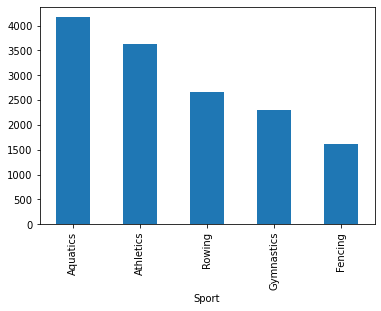

In [14]:
medals.head().plot.bar()

### 4. Which player has won most number of medals? (Top 5)

In [153]:
a.Athlete.value_counts().head()

PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
SHAKHLIN, Boris         13
MANGIAROTTI, Edoardo    13
Name: Athlete, dtype: int64

### OR

In [24]:
top_athlete=a.groupby(['Athlete']).Medal.count().sort_values(ascending = False)
top_athlete.head()

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
ONO, Takashi            13
MANGIAROTTI, Edoardo    13
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Athlete'>

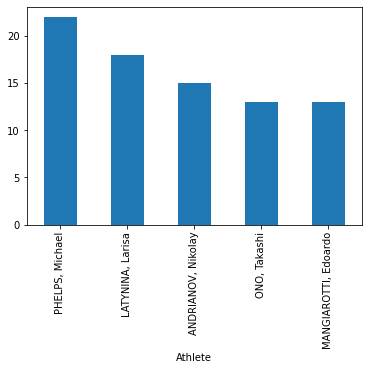

In [25]:
top_athlete.head().plot.bar()

### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [27]:
top_athelte_gold = a[a.Medal == 'Gold'].groupby(['Athlete', 'Country']).Medal.size().sort_values(ascending=False)
top_athelte_gold.head()

Athlete           Country
PHELPS, Michael   USA        18
LEWIS, Carl       USA         9
LATYNINA, Larisa  URS         9
NURMI, Paavo      FIN         9
SPITZ, Mark       USA         9
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Athlete,Country'>

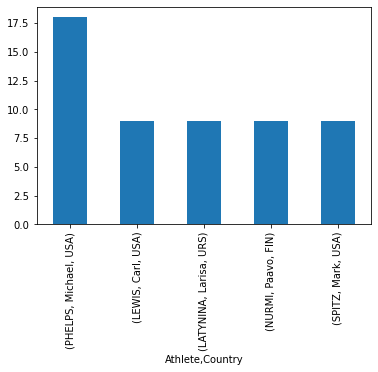

In [28]:
top_athelte_gold.head().plot.bar()

### 6. In which year India won first Gold Medal in Summer Olympics?

In [140]:
a1=a[a.Medal=='Gold']
min(a1[a1.Country=='IND'].Year)

1928

### 7. Which event is most popular in terms on number of players? (Top 5)

In [143]:
popular_event=a['Event'].value_counts().head()
popular_event

Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Event, dtype: int64

<AxesSubplot:>

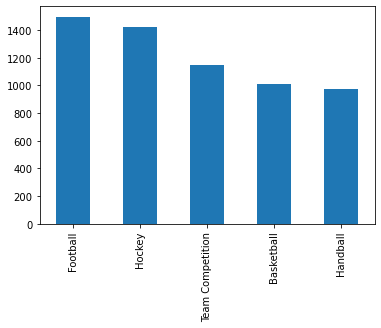

In [144]:
popular_event.plot.bar()

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [153]:
a.Gender.unique()

array(['Men', 'Women'], dtype=object)

In [146]:
a2=a[a.Gender=='Women']
female_gold_medalist=a2[a2.Medal=='Gold'].Sport.value_counts().head()
female_gold_medalist

Aquatics      589
Athletics     388
Gymnastics    268
Rowing        217
Volleyball    166
Name: Sport, dtype: int64

<AxesSubplot:>

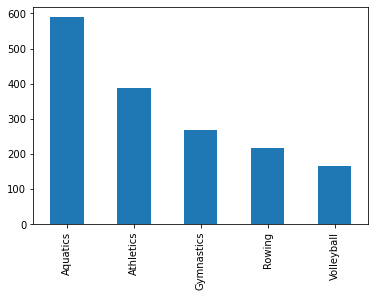

In [147]:
female_gold_medalist.plot.bar()